# Previsão do desempenho escolar de estudantes

## Alunos
- **Giulia Pereira Mendes** - Matrícula: 13687582
- **Juan Santana** - Matrícula: 11954311


Os dados consistem em notas de estudantes, o tempo de estudo e o número de cursos. O dataset foi baixado de https://www.kaggle.com/datasets/yasserh/student-marks-dataset.


## Propriedades do Dataset
- **Número de Instâncias:** 100
- **Número de Atributos:** 3, incluindo a variável alvo.

Este projeto é simples, mas desafiador, pois possui um número limitado de características e amostras. Nosso objetivo é construir um modelo de regressão que capture todos os padrões presentes no dataset, mantendo a generalização do modelo.

## Objetivo

1. Compreender o Dataset e realizar a limpeza dos dados (se necessário).
2. Construir modelos de Regressão para prever as notas dos estudantes.
3. Avaliar os modelos e comparar seus respectivos desempenhos, utilizando métricas como R², RMSE, etc.

## Análise e Limpeza dos Dados

### Entendimento Inicial
Primeiramente, carregaremos os dados e exploraremos suas características principais para entender a estrutura do dataset.

### Limpeza dos Dados
Verificaremos a presença de valores ausentes e dados inconsistentes, realizando a limpeza necessária para preparar os dados para a modelagem.

### Análise exploratória de dados
Iremos analisar os dados para escolher quais variáveis serão utilizadas para prever as notas dos estudantes. Esta análise incluirá a investigação de correlações entre possíveis variáveis preditoras (como tempo de estudo, número de cursos, etc.) e a variável resposta (nota dos estudantes).

## Criação do modelo
### Regressão Linear Simples
Desenvolveremos um modelo de regressão linear simples para prever as notas dos estudantes com base no tempo de estudo e no número de cursos.

## Avaliação dos Modelo

### Métricas de Avaliação
Avaliaremos os modelos utilizando métricas como o Coeficiente de Determinação (R²) e o Erro Quadrático Médio (RMSE).

## Conclusão

Nesta seção, discutiremos os achados principais do projeto, bem como possíveis melhorias e extensões futuras.

- **Conclusão:** Resumo dos resultados e eficácia dos modelos desenvolvidos.
- **Trabalhos Futuros:** Sugestões para aprimoramentos e futuras análises.


In [ ]:
#importando dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#importando o dataframe
df = pd.read_csv("Student_Marks.csv")

df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [ ]:
# Visualizand os dados
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


# Limpando os dados

In [ ]:
#Verifica se existe data faltando
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [ ]:
#Removendo outliers se necessário
numerical_columns = ["number_courses", 	"time_study", "Marks"]
df = df[(np.abs(stats.zscore(df[numerical_columns])) < 3).all(axis=1)]

# Análise exploratória dos dados

### Correlação linear
A correlação resume o grau de relacionamento entre duas variáveis e pode ser classificada como: <br>
**Direta(positiva):** As variáveis são diretamente proporcionais, se aumentarmos uma, a outra também aumentará. <br>
**Inversa(negativa):** As variáveis são inversamente proporcionais, se aumentarmos uma, a outra diminuirá. <br>
**Inexistente(nula):** Não existe relação entre as duas variáveis.

A correlação não significa casualidade.

### Coeficiente de correlação linear de Pearson
O coeficiente de correlação linear de Pearson mede o grau e o sinal da correlação linear entre duas variáveis (X e Y), podendo assumir valores entre -1 e 1. É definido por: <br>

$ r = \frac{\sum_{i=1}^{n}{[(X_{i} - \overline{X})×(Y_{i} - \overline{Y})]}}{\sqrt{\sum_{i=1}^{n}{[(X_{i} - \overline{X})^2×(Y_{i} - \overline{Y})^2]}}} $

Onde:

- $X_{i}$ é a i-ésima observação da variável X.
- $\overline{X}$ é a média da variável X.
- $Y_{i}$ é a i-ésima observação da variável Y.
- $\overline{Y}$ é a média da variável Y.
- $n$ é número de observações.

<Figure size 640x480 with 0 Axes>

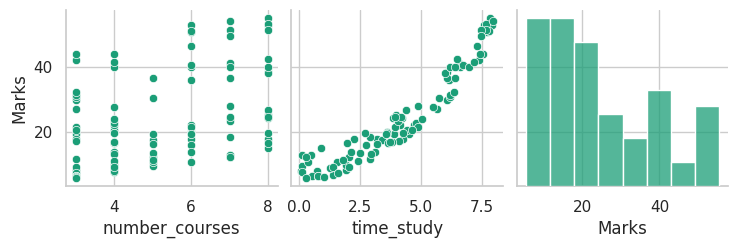

In [ ]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette("Dark2")
sns.despine()

sns.pairplot(df, y_vars='Marks')

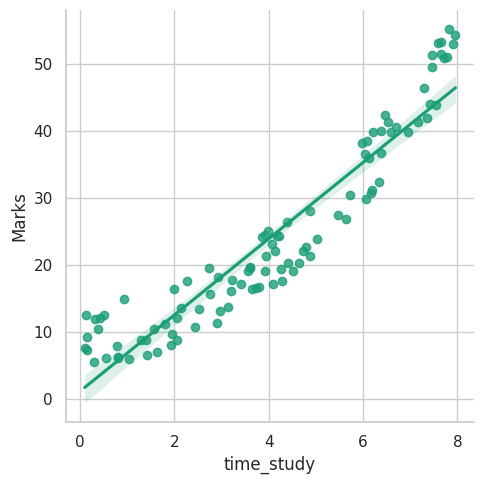

In [ ]:
# Regression line for correlated columns
sns.lmplot(x='time_study',y='Marks',data=df);



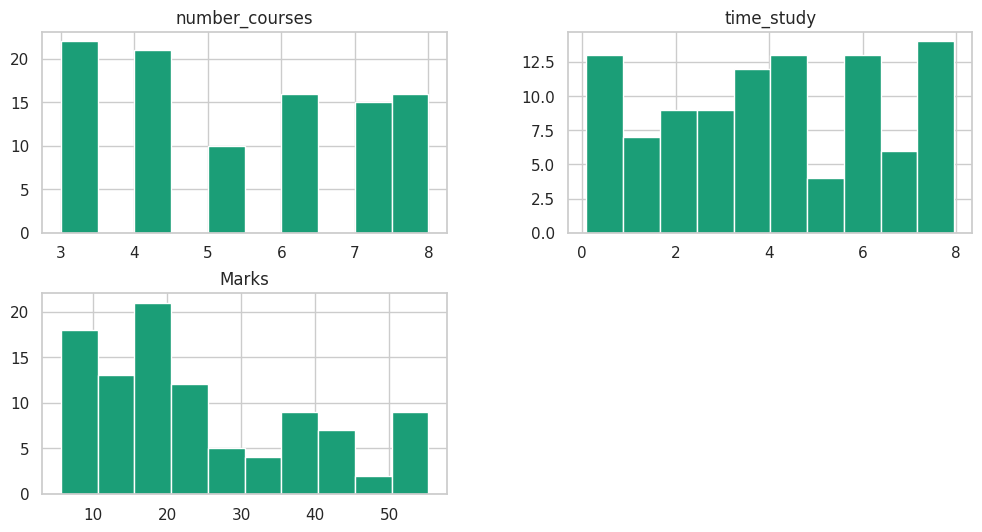

In [ ]:
#Distribuição das colunas númericas
df[numerical_columns].hist(figsize=(12, 6));

## Observações

### Correlação entre Marks e Study Time
Aparentemente, existe uma correlação forte entre as notas dos estudantes (Marks) e o tempo de estudo (Study Time). Isso sugere que, conforme o tempo de estudo aumenta, as notas dos estudantes tendem a melhorar.

### Distribuição das Notas (Marks)
Analisando a distribuição das notas dos estudantes, observa-se que as notas seguem uma distribuição assimétrica à direita. Isso significa que a maioria das notas dos estudantes está concentrada na faixa mais baixa, com uma cauda estendendo-se para as notas mais altas. Essa assimetria pode indicar que muitos estudantes alcançam notas próximas ao mínimo, com poucos obtendo notas significativamente mais altas.


# Regressão Linear Simples

A regressão linear simples é uma técnica estatística usada para modelar a relação entre uma variável dependente (também chamada de variável de resposta) e uma variável independente (também chamada de preditora ou explicativa). O objetivo é encontrar a melhor linha reta (modelo linear) que descreva a relação entre essas duas variáveis.

A equação da regressão linear simples é dada por:

\[ $y$ = $\beta_0$ + $\beta_1 x$ + $\epsilon$ \]

Onde:

- $y$ é a variável dependente.
- $x$ é a variável independente.
- $\beta_0$ é o intercepto.
- $\beta_1$ é o coeficiente angular.
- $\epsilon$ é o termo de erro.
## Passos para realizar a regressão linear simples

1. **Coletar os dados**: Obter um conjunto de dados que contenha as variáveis de interesse.
2. **Explorar os dados**: Analisar os dados para entender suas características.
3. **Preparar os dados**: Dividir os dados em conjuntos de treino e teste.
4. **Ajustar o modelo**: Usar o conjunto de treino para ajustar o modelo de regressão linear.
5. **Avaliar o modelo**: Avaliar a performance do modelo usando o conjunto de teste.
6. **Visualizar os resultados**: Visualizar os resultados da regressão e a distribuição dos resíduos.

Vamos demonstrar esses passos usando um exemplo prático.


In [ ]:
# Separando variável descritiva e resposta
X = df.loc[:, df.columns == "time_study"]
Y = df.loc[:, df.columns == "Marks"]

In [ ]:
#Separando em conjunto de treino e conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
#Criando modelo
lm = LinearRegression()

#Treinando modelo
lm.fit(X=X_train, y=y_train)



LinearRegression()

In [ ]:
# Fazendo a predição
predictions = lm.predict(X_test)



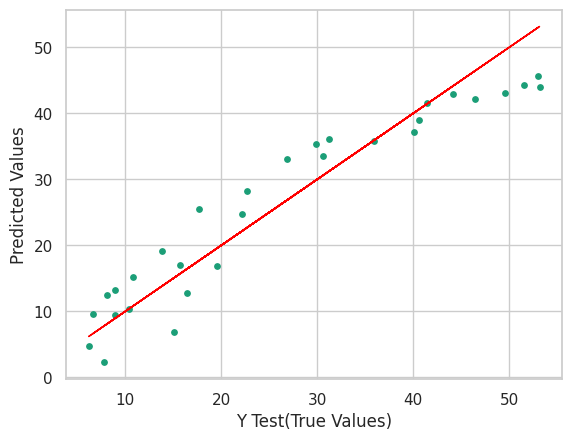

In [ ]:
plt.scatter(y_test,predictions,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)

plt.show()

In [ ]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.8749819322962206
R^2 on testing data  0.9071413681265447


Pelos valores do R^2 próximo a 1, logo significa que o modelo é bom em prever as mudanças dos dados. Além disso, a figura mostra que os dados previtos estão próximos aos reais e seguem o mesmo comportamento.

# Análise de significância

In [ ]:
# Obter os coeficientes e o intercepto do modelo
coef = lm.coef_[0]
intercept = lm.intercept_

# Calcular o valor p para o coeficiente
t_stat = coef / (np.std(predictions - y_test) / np.sqrt(len(y_test)))
p_value = stats.t.sf(np.abs(t_stat), len(y_test)-1)*2

print(f'Coeficiente: {coef}')
print(f'Intercepto: {intercept}')
print(f'T-statistic: {t_stat}')
print(f'P-valor: {p_value}')


Coeficiente: [5.55839723]
Intercepto: [1.72380745]
T-statistic: Marks    6.40115
dtype: float64
P-valor: [5.33210005e-07]


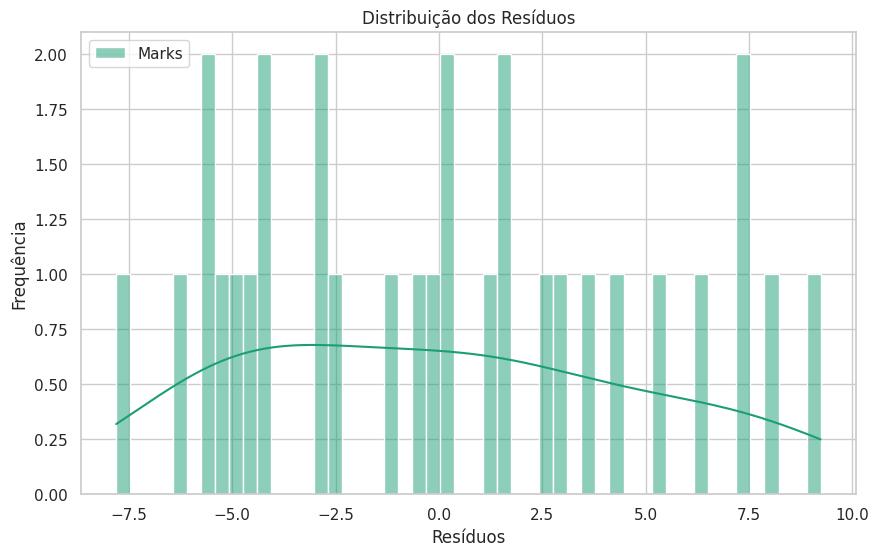

In [ ]:
# Calcular os resíduos
residuals = y_test - predictions

# Plotar a distribuição dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()
